## Rate plots down currents. Several iterations with final rate+CI error bar plots at the bottom

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

OUTPATH = './output'
IOPATH = '/ocean/rbeutel/MOAD/analysis-becca/Synthesis/data/CCS_obs.csv'

## Loading Data and Indicators

In [3]:
# reduce potential bias caused by sampling programs going out in different months
# summer only (april-sep inclusive) based on PreliminaryCurrentAnalysis.ipynb
obs = obs[(obs.month>=4)&(obs.month<=9)]
obs

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,time,longitude (degrees_east),latitude (degrees_north),depth (m),pressure (dbar),temperature (degC),salinity (g kg-1),...,Ni (nmol kg-1),Zn (nmol kg-1),source,current,location,[TA-DIC] (uM),year,month,NSdist,EWdist
0,0,0,0,1933-07-25 00:00:00+00:00,-126.76,49.34,1.0,1.008587,NaN,32.070847,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,-158.177943,-0.0
1,1,1,1,1933-07-25 00:00:00+00:00,-126.76,49.34,2.0,2.017180,NaN,32.090943,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,-158.177943,-0.0
2,2,2,2,1933-07-25 00:00:00+00:00,-126.76,49.34,4.0,4.034378,NaN,32.090906,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,-158.177943,-0.0
3,3,3,3,1933-07-25 00:00:00+00:00,-126.76,49.34,6.0,6.051598,NaN,32.090870,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,-158.177943,-0.0
4,4,4,4,1933-07-25 00:00:00+00:00,-126.76,49.34,10.0,10.086095,NaN,32.181305,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,-158.177943,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721761,1721761,1721761,1804439,2024-09-30 00:00:00+00:00,-124.57,46.99,0.0,0.000000,10.000050,33.328536,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,9,133.256480,-0.0
1721762,1721762,1721762,1804440,2024-09-30 00:00:00+00:00,-124.56,46.99,0.0,0.000000,12.388119,32.661681,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,9,133.256480,-0.0
1721763,1721763,1721763,1804441,2024-09-30 00:00:00+00:00,-124.31,44.64,0.0,0.000000,9.441516,33.522238,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,9,377.942065,NaN
1721764,1721764,1721764,1804442,2024-09-30 00:00:00+00:00,-124.27,47.13,0.0,0.000000,11.669242,32.555657,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,9,133.256480,-0.0


In [2]:
obs = pd.read_csv(IOPATH)
for col, count in obs.count().items():
    print(f"{col}: {count} non-NaN values")
obs

Unnamed: 0.2: 1722334 non-NaN values
Unnamed: 0.1: 1722334 non-NaN values
Unnamed: 0: 1722334 non-NaN values
time: 1722334 non-NaN values
longitude (degrees_east): 1722334 non-NaN values
latitude (degrees_north): 1722334 non-NaN values
depth (m): 1722334 non-NaN values
pressure (dbar): 1722334 non-NaN values
temperature (degC): 1502913 non-NaN values
salinity (g kg-1): 1722334 non-NaN values
density (kg m-3): 1502913 non-NaN values
spice: 1502913 non-NaN values
sigma0 (kg m-3): 1502913 non-NaN values
DO (umol kg-1): 971067 non-NaN values
NO3 (uM): 388874 non-NaN values
NO2 (uM): 339926 non-NaN values
NH4 (uM): 5179 non-NaN values
Nstar (umol kg-1): 380563 non-NaN values
PO4 (uM): 429391 non-NaN values
SiO4 (uM): 53321 non-NaN values
Chl (mg m-3): 35010 non-NaN values
TA (uM): 8039 non-NaN values
DIC (uM): 8024 non-NaN values
Carbonate: 2359 non-NaN values
Aragonite: 6901 non-NaN values
Calcite: 6901 non-NaN values
Cd (nmol kg-1): 229 non-NaN values
Co (nmol kg-1): 225 non-NaN values
Cu

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,time,longitude (degrees_east),latitude (degrees_north),depth (m),pressure (dbar),temperature (degC),salinity (g kg-1),...,Ni (nmol kg-1),Zn (nmol kg-1),source,current,location,[TA-DIC] (uM),year,month,NSdist,EWdist
0,0,0,0,1933-07-25 00:00:00+00:00,-126.76,49.34,1.0,1.008587,NaN,32.070847,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,-158.177943,-0.0
1,1,1,1,1933-07-25 00:00:00+00:00,-126.76,49.34,2.0,2.017180,NaN,32.090943,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,-158.177943,-0.0
2,2,2,2,1933-07-25 00:00:00+00:00,-126.76,49.34,4.0,4.034378,NaN,32.090906,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,-158.177943,-0.0
3,3,3,3,1933-07-25 00:00:00+00:00,-126.76,49.34,6.0,6.051598,NaN,32.090870,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,-158.177943,-0.0
4,4,4,4,1933-07-25 00:00:00+00:00,-126.76,49.34,10.0,10.086095,NaN,32.181305,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,-158.177943,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722329,1722329,1722329,1805040,2024-11-18 00:00:00+00:00,-124.95,44.38,0.0,0.000000,12.713836,32.386146,...,NaN,NaN,ooi,NaN,slope,NaN,2024,11,377.942065,NaN
1722330,1722330,1722330,1805041,2024-11-18 00:00:00+00:00,-124.94,44.36,0.0,0.000000,12.712860,32.386131,...,NaN,NaN,ooi,NaN,slope,NaN,2024,11,377.942065,NaN
1722331,1722331,1722331,1805042,2024-11-18 00:00:00+00:00,-124.57,46.99,0.0,0.000000,10.586080,32.728763,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,11,133.256480,-0.0
1722332,1722332,1722332,1805043,2024-11-18 00:00:00+00:00,-124.56,46.99,0.0,0.000000,12.215222,32.245641,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,11,133.256480,-0.0


In [4]:
# Setting up different currents
obs_shelf = obs[obs['current'] == 'shelf']
obs_cuc = obs[obs['current'] == 'CUC']
obs_cc = obs[obs['current'] == 'CC']

In [5]:
# make a 'dist' column of the distances we're actually going to use for each current
# for shelf and cuc its simply the NS dist

obs_cuc['dist'] = obs_cuc.NSdist
obs_shelf['dist'] = obs_shelf.NSdist

# for the CC its a bit more complicated
# first, just pick whatever line the point is closer to
abs_a = obs_cc.NSdist.abs()
abs_b = obs_cc.EWdist.abs()

obs_cc['dist'] = np.select(
    [
        abs_a < abs_b,       # a closer to zero
        abs_b < abs_a,       # b closer to zero
        abs_a.isna(),        # a NaN, take b
        abs_b.isna()         # b NaN, take a
    ],
    [
        obs_cc.NSdist,
        obs_cc.EWdist,
        obs_cc.EWdist,
        obs_cc.NSdist
    ],
    default=np.nan
)

# and then also default that anywhere that the NS dist is -ve, the EW distance should be taken
obs_cc.dist[obs_cc.NSdist < 0] = obs_cc.EWdist

## Figures

In [10]:
def plot_ratediff_NS_CI(var_string, current_string, subplot_pos,
                        n_bins=9, cov_type="HAC", hac_maxlags=1,
                        annual_stat="median", min_obs_per_year=3,
                        min_years=4, min_span_years=10):
    # pick data by current
    if current_string == 'CUC':
        obs_used = obs_cuc
    elif current_string == 'Shelf_Current':
        obs_used = obs_shelf
    elif current_string == 'CC':
        obs_used = obs_cc
    else:
        raise ValueError("Invalid current_string. Use 'CC', 'CUC', or 'Shelf_Current'.")

    ylim_dict = {'spice':[-0.04,0.02], 'temperature (degC)': [-0.2,0.2],
                 'salinity (g kg-1)':[-0.03,0.03], 'DO (umol kg-1)':[-3.7,3],
                 'NO3 (uM)':[-1.9,0.5], '[TA-DIC] (uM)':[-10,17]}

    # bin edges/centers/widths
    dist = np.asarray(obs_used['dist'])
    dmin, dmax =  -1415, 2950
    edges   = np.linspace(dmin, dmax, n_bins+1)
    centers = 0.5 * (edges[:-1] + edges[1:])
    # keep your "narrow bar" choice but ensure width is positive
    widths  = np.maximum((edges[1:] - edges[:-1]) - 200, 1e-6)

    slopes      = np.full(n_bins, np.nan)
    lo95        = np.full(n_bins, np.nan)
    hi95        = np.full(n_bins, np.nan)
    year_span   = np.full(n_bins, np.nan)   # NaN => excluded
    n_years_arr = np.full(n_bins, np.nan)

    years_all = np.asarray(obs_used['year'])
    y_all     = np.asarray(obs_used[var_string])

    for i in range(n_bins):
        lo, hi = edges[i], edges[i+1]
        msk = (dist >= lo) & (dist < hi) & np.isfinite(years_all) & np.isfinite(y_all)
        if not np.any(msk):
            continue

        # (1) aggregate to annual values with ≥ min_obs_per_year
        df_bin = pd.DataFrame({
            "year": years_all[msk].astype(float),
            "val":  y_all[msk].astype(float)
        })

        # distinct years and span
        n_years = len(set(df_bin["year"]))
        span = float(df_bin["year"].max() - df_bin["year"].min() + 1)

        if (n_years < min_years) or (span < min_span_years):
            # exclude this bin from both points and bars
            continue

        grp = df_bin.groupby("year", as_index=False).agg(
            n=("val", "size"),
            med=("val", "median"),
            mean=("val", "mean")
        )
        grp = grp[grp["n"] >= min_obs_per_year]
        if grp.empty:
            continue

        n_years_arr[i] = n_years
        year_span[i]   = span

        Y_ann = grp["med"].values if annual_stat == "median" else grp["mean"].values
        X_ann = grp["year"].values

        # (2) OLS with equal weight per year + (3) robust SEs
        X = sm.add_constant(X_ann)
        ols = sm.OLS(Y_ann, X)
        if cov_type == "HAC":
            res = ols.fit(cov_type="HAC", cov_kwds={"maxlags": int(hac_maxlags)})
        else:
            res = ols.fit(cov_type=cov_type)

        slopes[i] = res.params[1]
        ci = res.conf_int(alpha=0.05)
        if ci.shape[0] > 1:
            lo95[i], hi95[i] = ci[1, 0], ci[1, 1]

    # === plotting ===
    ax_tr = ax[subplot_pos]
    ax_yr = ax_tr.twinx()

    # Only plot bars for bins that passed filters
    m_bar = np.isfinite(year_span)
    if np.any(m_bar):
        ax_yr.bar(centers[m_bar], year_span[m_bar], width=widths[m_bar],
                  color='lightblue', alpha=0.7, zorder=1)
    ax_yr.set_ylabel('Span of years present (yr)')
    ax_yr.set_ylim([0,100])
    ax_yr.set_yticks([10,20,30,40,50,60,70,80,90,100])
    ax_yr.grid(axis='y',color='w',zorder=2)

    # points + 95% CI for valid bins only
    m_ok = np.isfinite(slopes) & np.isfinite(lo95) & np.isfinite(hi95)
    if np.any(m_ok):
        yerr = np.vstack([hi95[m_ok] - slopes[m_ok], slopes[m_ok] - lo95[m_ok]])
        ax_tr.errorbar(centers[m_ok], slopes[m_ok], yerr=yerr, fmt='.', ms=7,
                       c='darkblue', label='95% CI',zorder=4)

    ax_tr.set_xlim(dmin - 0.05*(dmax-dmin), dmax + 0.05*(dmax-dmin))
    ax_tr.set_xlabel('Distance Along Line (km)')
    if var_string == 'spice':
        ax_tr.set_ylabel('Rate of Change: Spice (kg m$^{-3}$ yr$^{-1}$)')
    else:
        ax_tr.set_ylabel(f"Rate of Change: {var_string} per year")

    ax_tr.set_title(f'{var_string} trend by distance bin ({current_string})')
    # ax_tr.grid(True, alpha=0.3)
    ax_tr.axhline(0, color='black', lw=1,zorder=3)

    if var_string in ylim_dict:
        ax_tr.set_ylim(ylim_dict[var_string])

    # add lines for JdF, Cape Mendocino, and Point Conception
    ax_tr.plot([805,805],[-1000,1000],'k--',alpha=0.5) # Cape Mendocino
    ax_tr.plot([1654,1654],[-1000,1000],'k--',alpha=0.5) # Point Conception
    ax_tr.text(0.58,0.02,'CM',ha='right',va='bottom',transform=ax_tr.transAxes,fontsize=10)
    ax_tr.text(0.75,0.02,'PC',ha='right',va='bottom',transform=ax_tr.transAxes,fontsize=10)

    ax_yr.set_zorder(1)
    ax_tr.set_zorder(3)
    ax_tr.patch.set_alpha(0)
    # ax_tr.legend(loc='best')




In [76]:
def trend_check(obs_used,var_string,n_bins=9,min_obs_per_year=3,hac_maxlags=1,firstfull=True):

    ylim_dict = {'spice': [-2, 3], 'temperature (degC)': [5, 20], 'salinity (g kg-1)': [30, 35],
                    'DO (umol kg-1)': [0,400], 'NO3 (uM)': [0,50], '[TA-DIC] (uM)': [-50,300]}

    # bin edges/centers/widths
    dist = np.asarray(obs_used['dist'])
    dmin, dmax =  -1415, 2950
    edges   = np.linspace(dmin, dmax, n_bins+1)
    years_all = np.asarray(obs_used['year'])
    y_all     = np.asarray(obs_used[var_string])

    fig, ax = plt.subplots(1,n_bins,figsize=[18,3])

    for i in range(n_bins):
        lo, hi = edges[i], edges[i+1]
        msk = (dist >= lo) & (dist < hi) & np.isfinite(years_all) & np.isfinite(y_all)
        if not np.any(msk):
            continue


        # (1) aggregate to annual values with ≥ min_obs_per_year
        df_bin = pd.DataFrame({
            "year": years_all[msk].astype(float),
            "val":  y_all[msk].astype(float)
        })

        grp = df_bin.groupby("year", as_index=False).agg(
            n=("val", "size"),
            med=("val", "median"),
            mean=("val", "mean")
            )
        grp = grp[grp["n"] >= min_obs_per_year]
        if grp.empty:
            continue

        Y_ann = grp["mean"].values
        X_ann = grp["year"].values
        if len(Y_ann) <3:
            continue

        # (2) OLS with equal weight per year + (3) robust SEs
        X = sm.add_constant(X_ann)
        ols = sm.OLS(Y_ann, X)
        res = ols.fit(cov_type="HAC", cov_kwds={"maxlags": int(hac_maxlags)})

        y = res.params[1]*X_ann + res.params[0]

        # plot
        ax[i].scatter(df_bin.year, df_bin.val,s=0.5,alpha=0.3)
        ax[i].scatter(X_ann,Y_ann,s=12,color='r')
        ax[i].plot(X_ann,y,'k')

        ax[i].set_ylim(ylim_dict[var_string])
        ax[i].set_yticks(np.linspace(ylim_dict[var_string][0],ylim_dict[var_string][1],4))
        ax[i].set_yticklabels([])
        title = "{} to {} km".format(lo,hi)
        ax[i].set_title(title,fontsize=10)
    if firstfull==True:
        ax[0].set_yticklabels(np.round(np.linspace(ylim_dict[var_string][0],ylim_dict[var_string][1],4),1))
    else:
        ax[1].set_yticklabels(np.round(np.linspace(ylim_dict[var_string][0],ylim_dict[var_string][1],4),1))

    plt.tight_layout()

# Shelf

SPICE


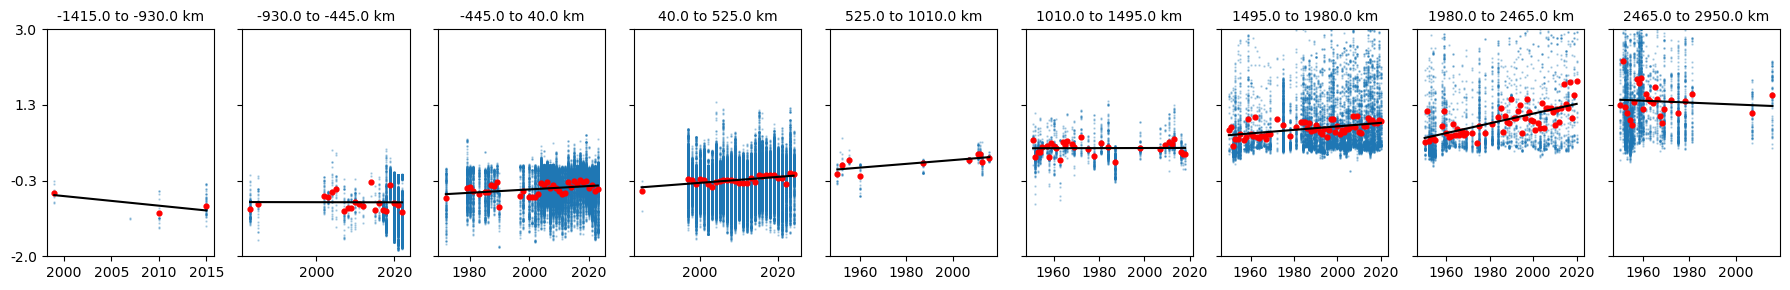

In [50]:
print('SPICE')
trend_check(obs_shelf,'spice',n_bins=9,min_obs_per_year=3,hac_maxlags=1)

TEMPERATURE


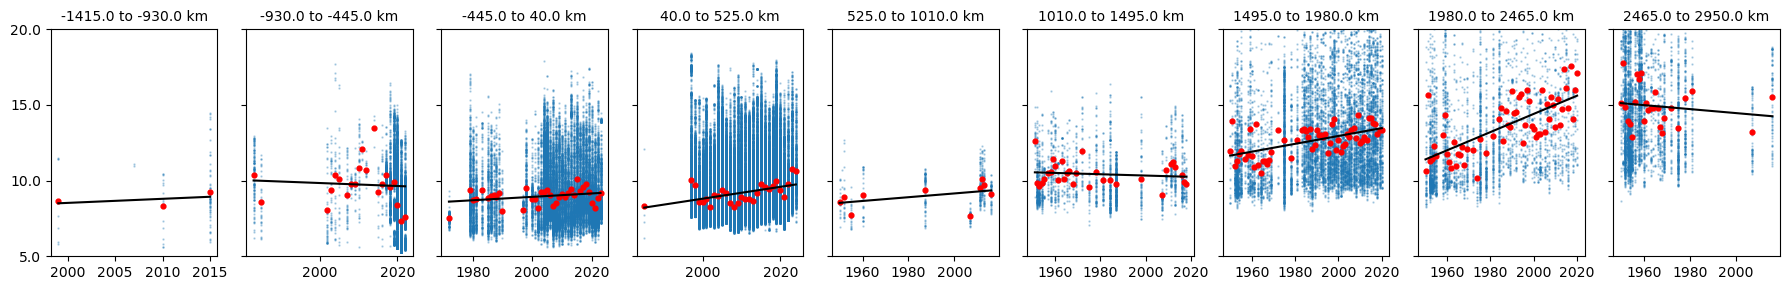

In [51]:
print('TEMPERATURE')
trend_check(obs_shelf,'temperature (degC)',n_bins=9,min_obs_per_year=3,hac_maxlags=1)

SALINITY


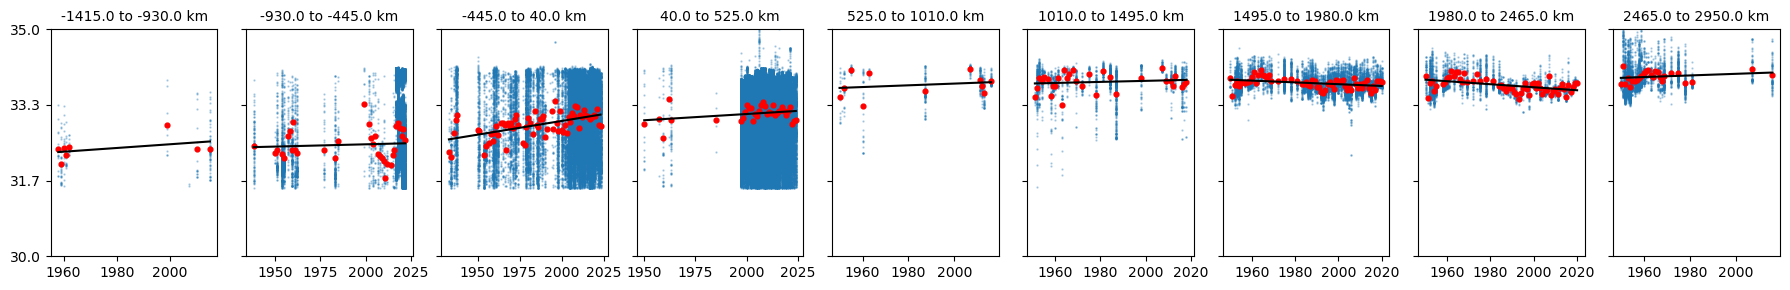

In [52]:
print('SALINITY')
trend_check(obs_shelf,'salinity (g kg-1)',n_bins=9,min_obs_per_year=3,hac_maxlags=1)

OXYGEN


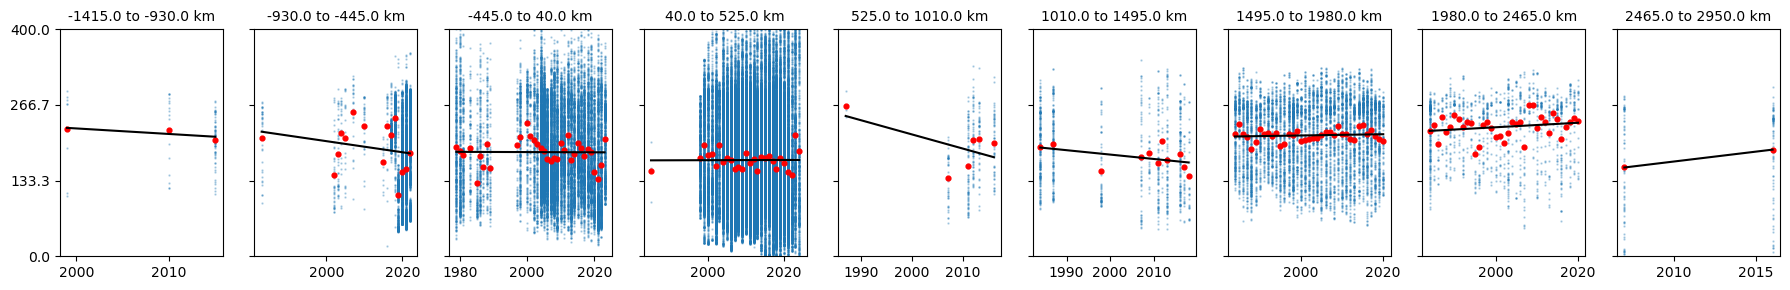

In [56]:
print('OXYGEN')
trend_check(obs_shelf,'DO (umol kg-1)',n_bins=9,min_obs_per_year=3,hac_maxlags=1)

NITRATE


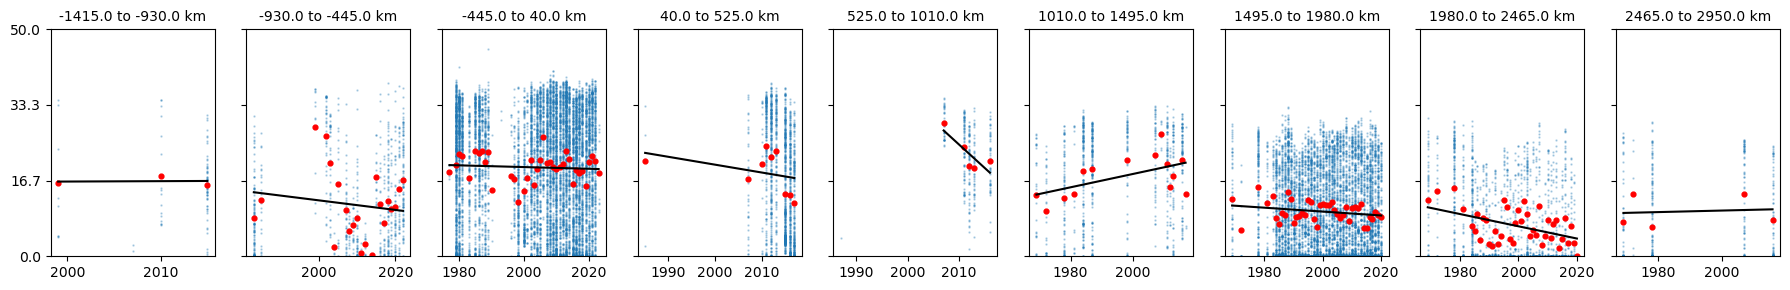

In [54]:
print('NITRATE')
trend_check(obs_shelf,'NO3 (uM)',n_bins=9,min_obs_per_year=3,hac_maxlags=1)

[TA-DIC]


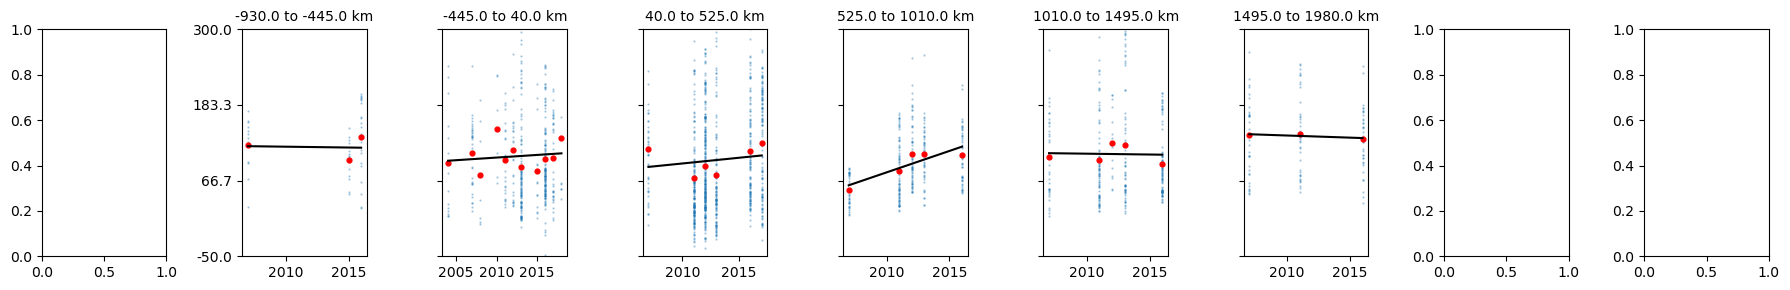

In [80]:
print('[TA-DIC]')
trend_check(obs_shelf,'[TA-DIC] (uM)',n_bins=9,min_obs_per_year=3,hac_maxlags=1,firstfull=False)

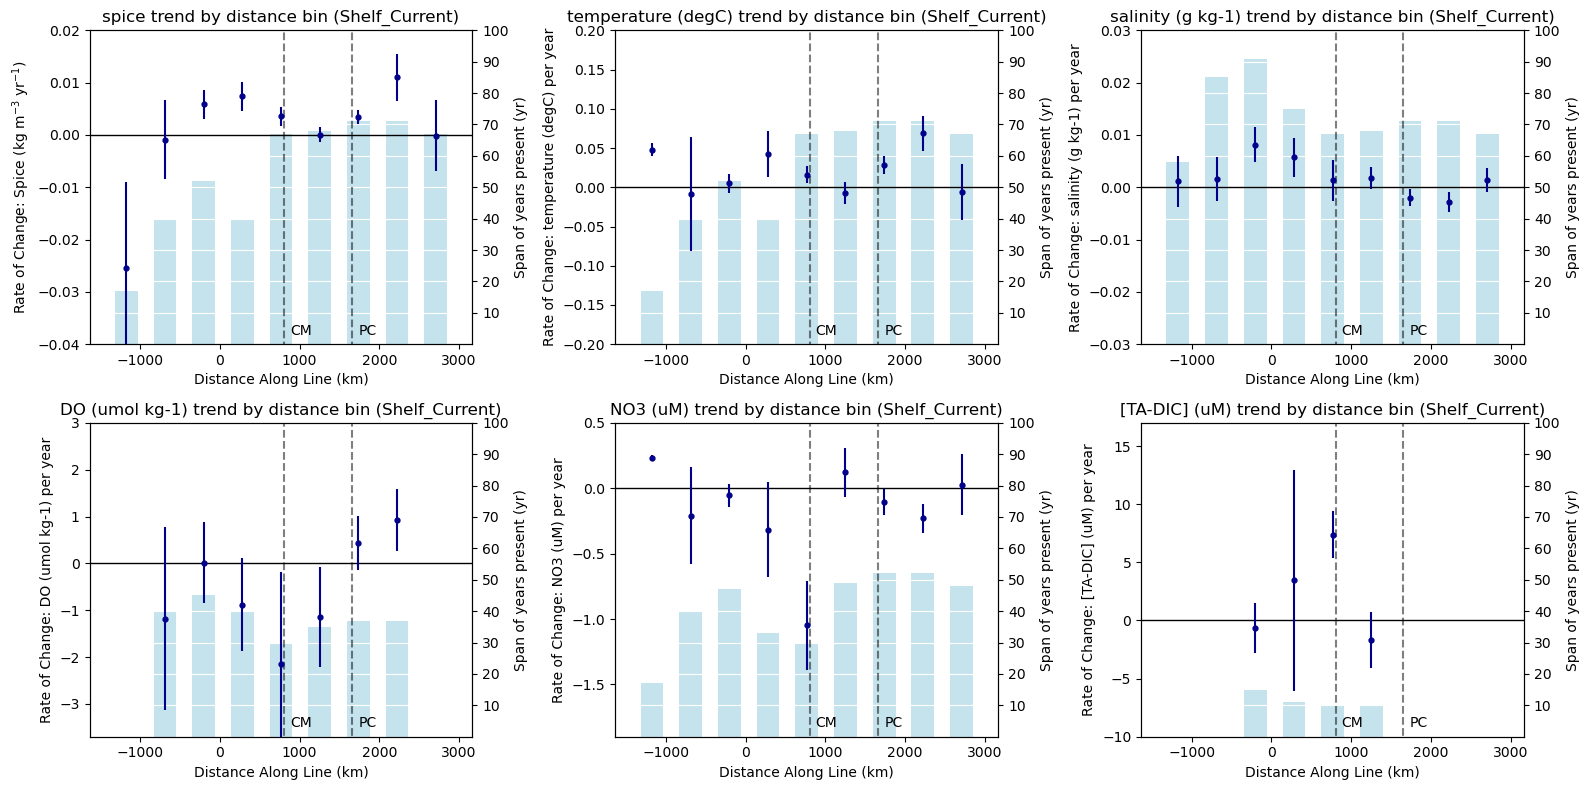

In [11]:
fig, ax = plt.subplots(2,3, figsize=(16, 8))
plot_ratediff_NS_CI('spice', 'Shelf_Current', (0,0))
plot_ratediff_NS_CI('temperature (degC)', 'Shelf_Current', (0,1))
plot_ratediff_NS_CI('salinity (g kg-1)', 'Shelf_Current', (0,2))
plot_ratediff_NS_CI('DO (umol kg-1)', 'Shelf_Current', (1,0))
plot_ratediff_NS_CI('NO3 (uM)', 'Shelf_Current', (1,1))
plot_ratediff_NS_CI('[TA-DIC] (uM)', 'Shelf_Current', (1,2))
plt.tight_layout()

# CC

SPICE


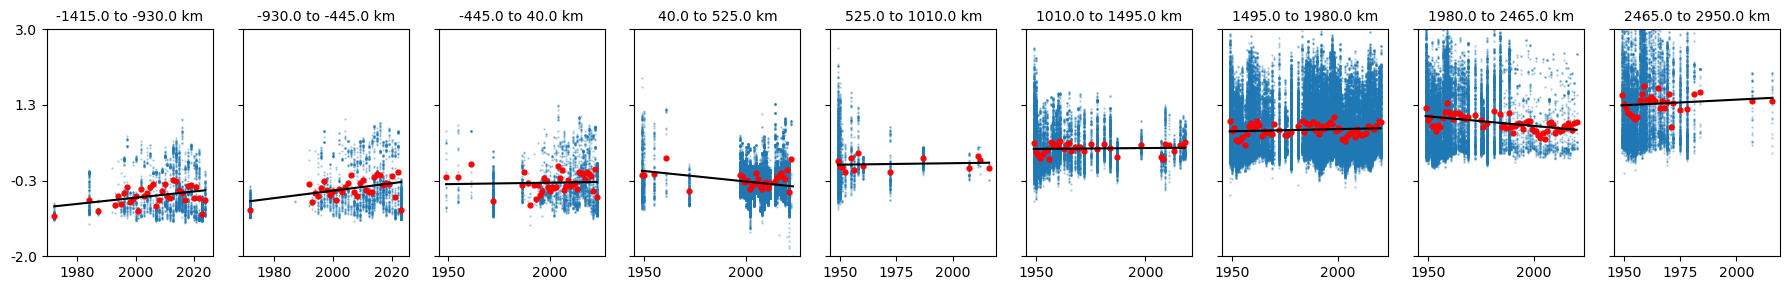

In [57]:
print('SPICE')
trend_check(obs_cc,'spice',n_bins=9,min_obs_per_year=3,hac_maxlags=1)

TEMPERATURE


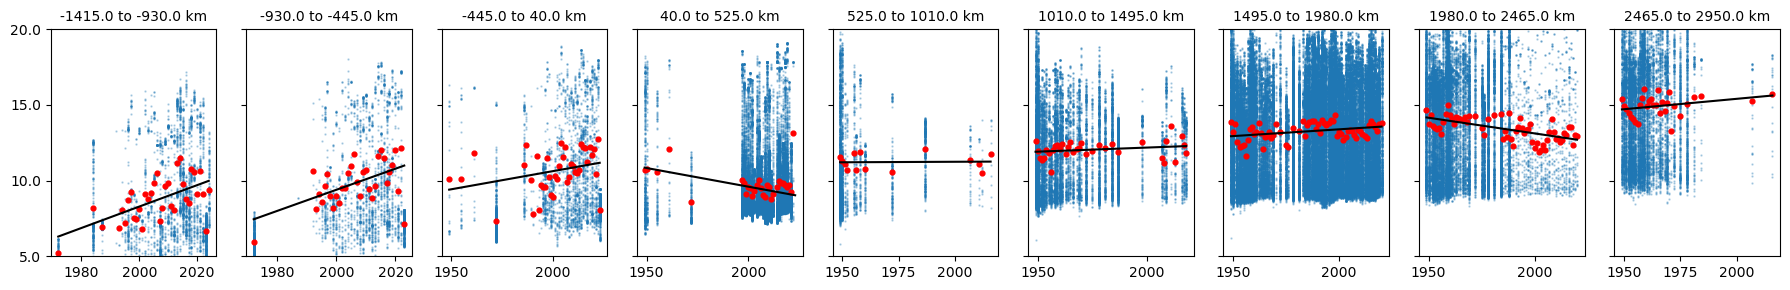

In [59]:
print('TEMPERATURE')
trend_check(obs_cc,'temperature (degC)',n_bins=9,min_obs_per_year=3,hac_maxlags=1)

SALINITY


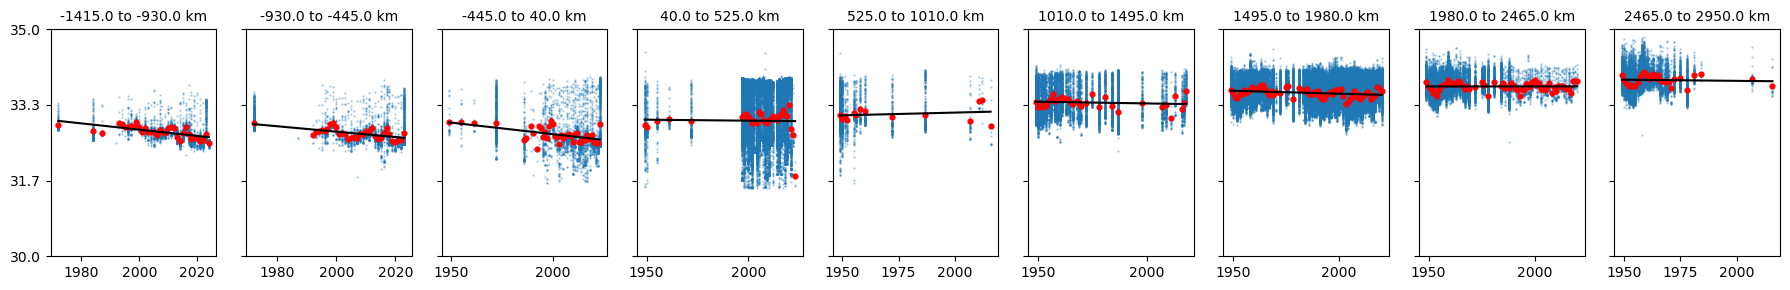

In [60]:
print('SALINITY')
trend_check(obs_cc,'salinity (g kg-1)',n_bins=9,min_obs_per_year=3,hac_maxlags=1)

OXYGEN


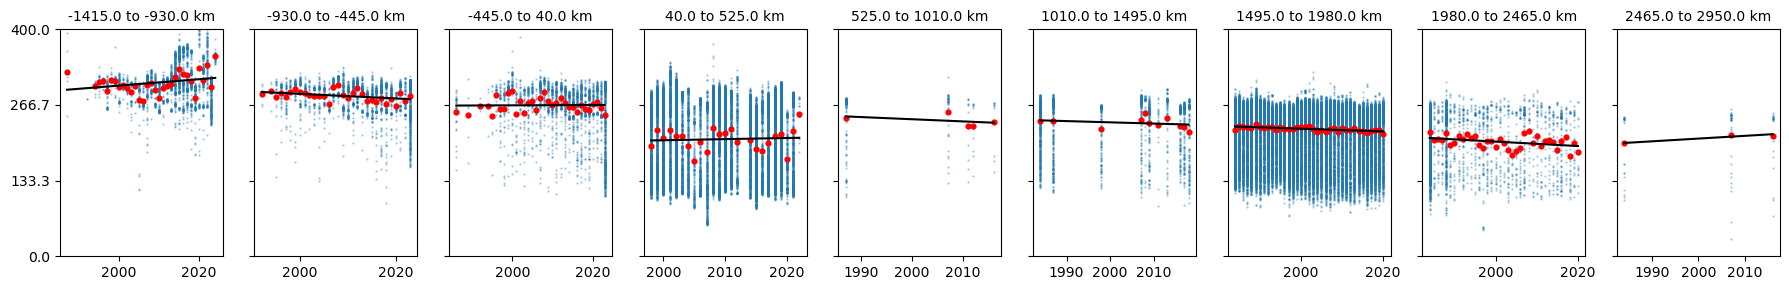

In [61]:
print('OXYGEN')
trend_check(obs_cc,'DO (umol kg-1)',n_bins=9,min_obs_per_year=3,hac_maxlags=1)

NITRATE


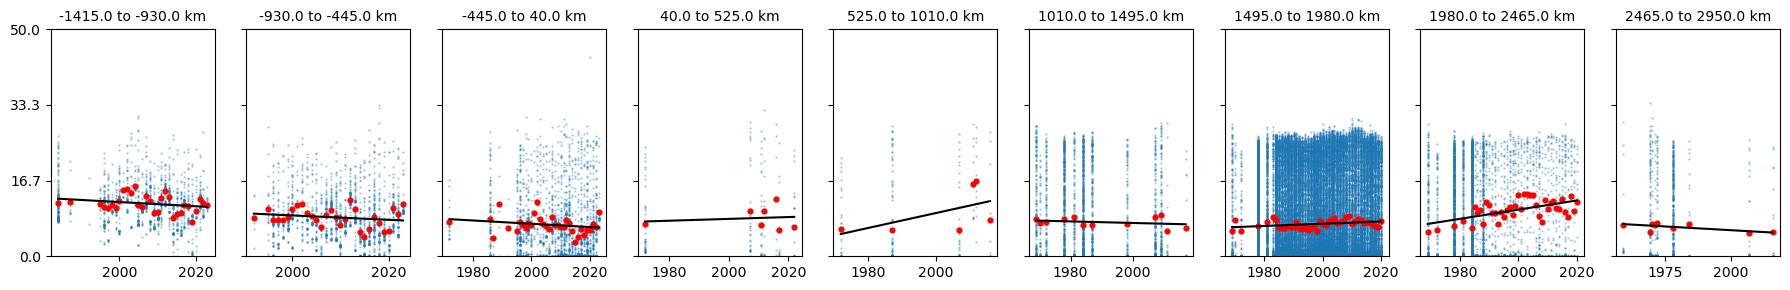

In [62]:
print('NITRATE')
trend_check(obs_cc,'NO3 (uM)',n_bins=9,min_obs_per_year=3,hac_maxlags=1)

[TA-DIC]


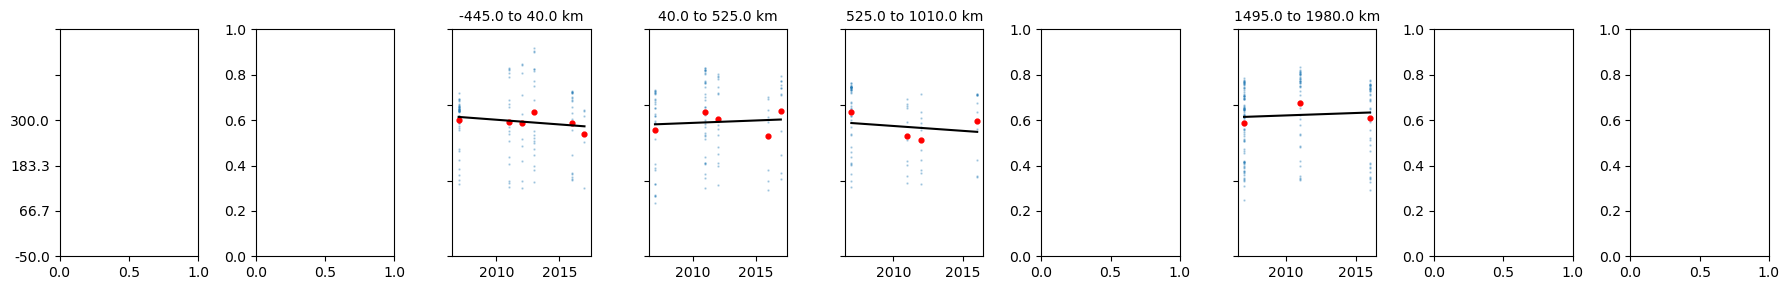

In [79]:
print('[TA-DIC]')
trend_check(obs_cc,'[TA-DIC] (uM)',n_bins=9,min_obs_per_year=3,hac_maxlags=1)

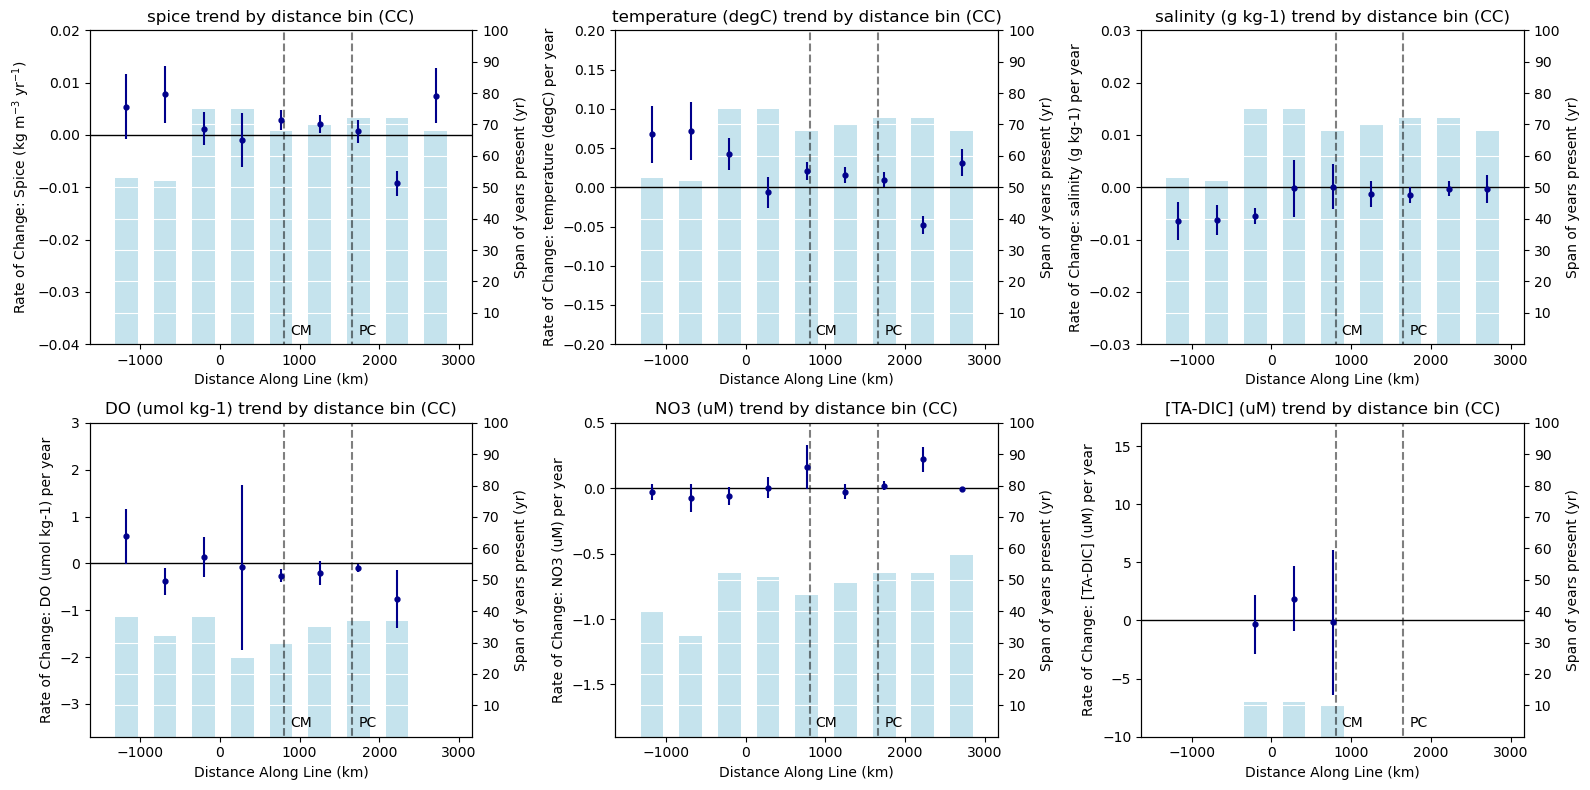

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(16, 8))
plot_ratediff_NS_CI('spice', 'CC', (0,0))
plot_ratediff_NS_CI('temperature (degC)', 'CC', (0,1))
plot_ratediff_NS_CI('salinity (g kg-1)', 'CC', (0,2))
plot_ratediff_NS_CI('DO (umol kg-1)', 'CC', (1,0))
plot_ratediff_NS_CI('NO3 (uM)', 'CC', (1,1))
plot_ratediff_NS_CI('[TA-DIC] (uM)', 'CC', (1,2))
plt.tight_layout()

# CUC

SPICE


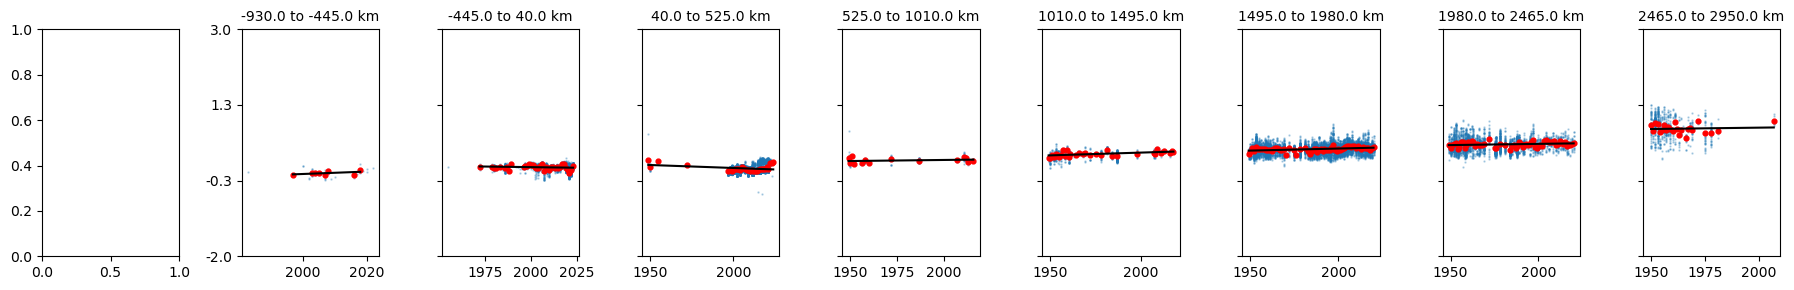

In [69]:
print('SPICE')
trend_check(obs_cuc,'spice',n_bins=9,min_obs_per_year=3,hac_maxlags=1,firstfull=False)

TEMPERATURE


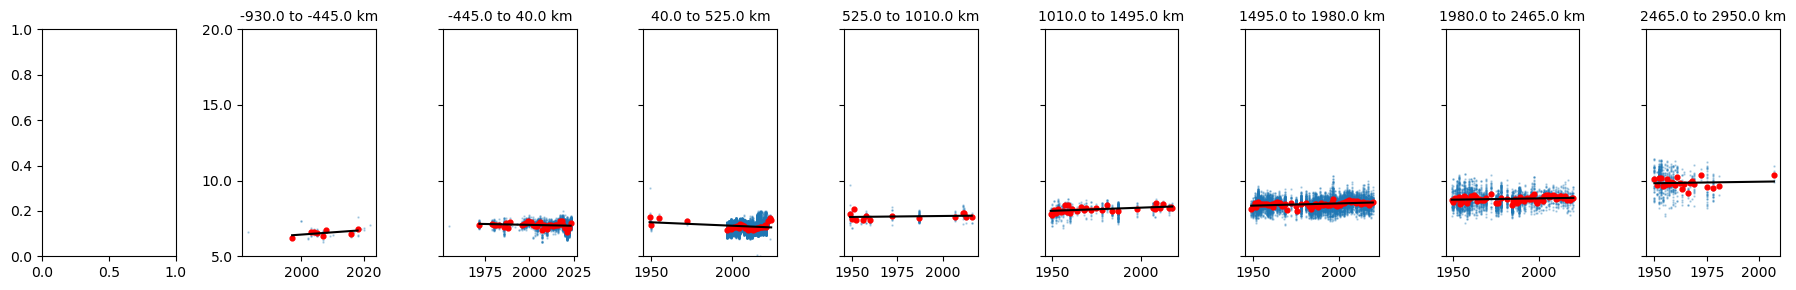

In [70]:
print('TEMPERATURE')
trend_check(obs_cuc,'temperature (degC)',n_bins=9,min_obs_per_year=3,hac_maxlags=1,firstfull=False)

SPICE


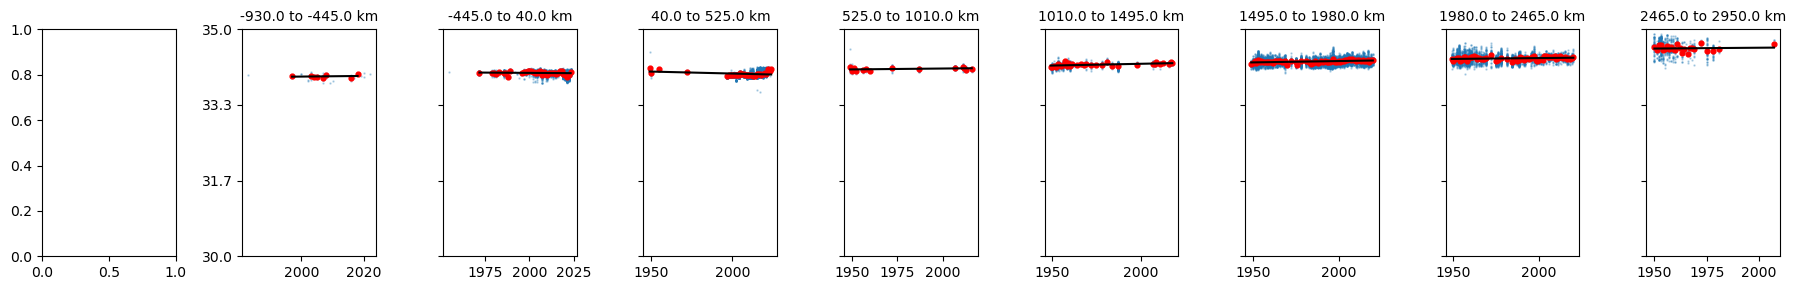

In [71]:
print('SPICE')
trend_check(obs_cuc,'salinity (g kg-1)',n_bins=9,min_obs_per_year=3,hac_maxlags=1,firstfull=False)

OXYGEN


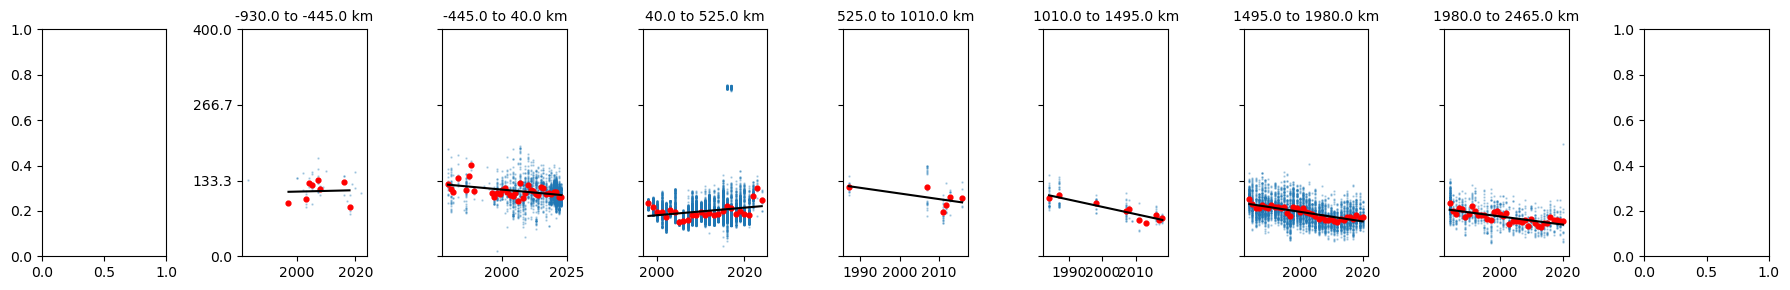

In [77]:
print('OXYGEN')
trend_check(obs_cuc,'DO (umol kg-1)',n_bins=9,min_obs_per_year=3,hac_maxlags=1,firstfull=False)

NITRATE


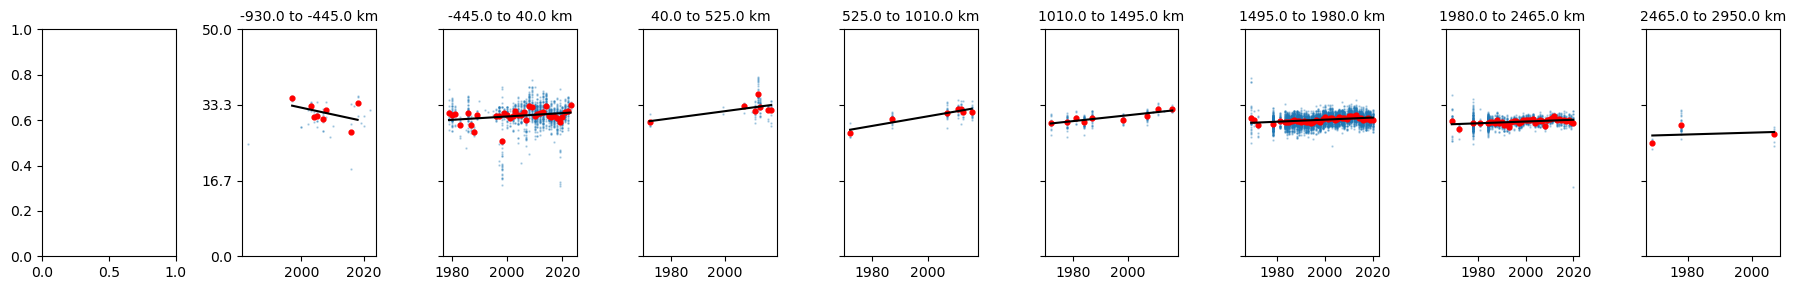

In [74]:
print('NITRATE')
trend_check(obs_cuc,'NO3 (uM)',n_bins=9,min_obs_per_year=3,hac_maxlags=1,firstfull=False)

[TA-DIC]


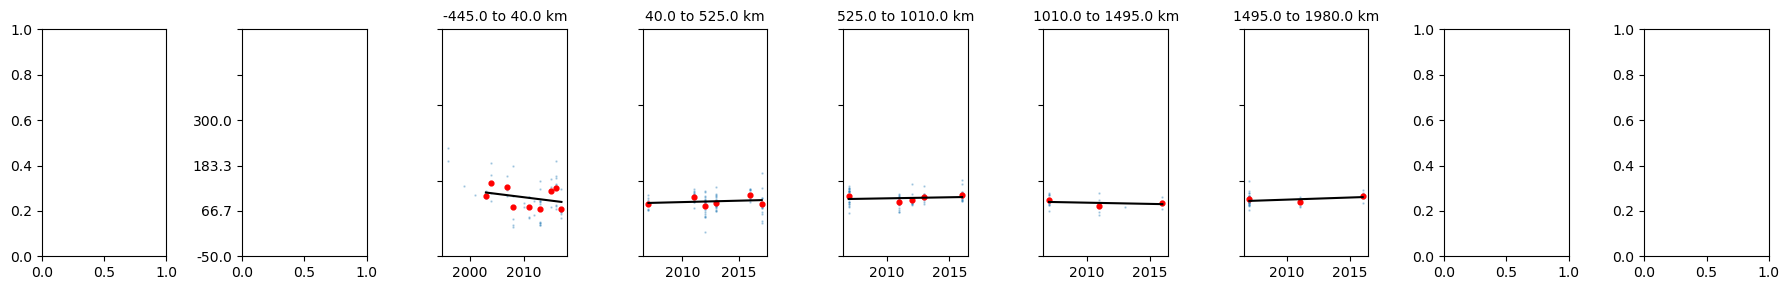

In [78]:
print('[TA-DIC]')
trend_check(obs_cuc,'[TA-DIC] (uM)',n_bins=9,min_obs_per_year=3,hac_maxlags=1,firstfull=False)

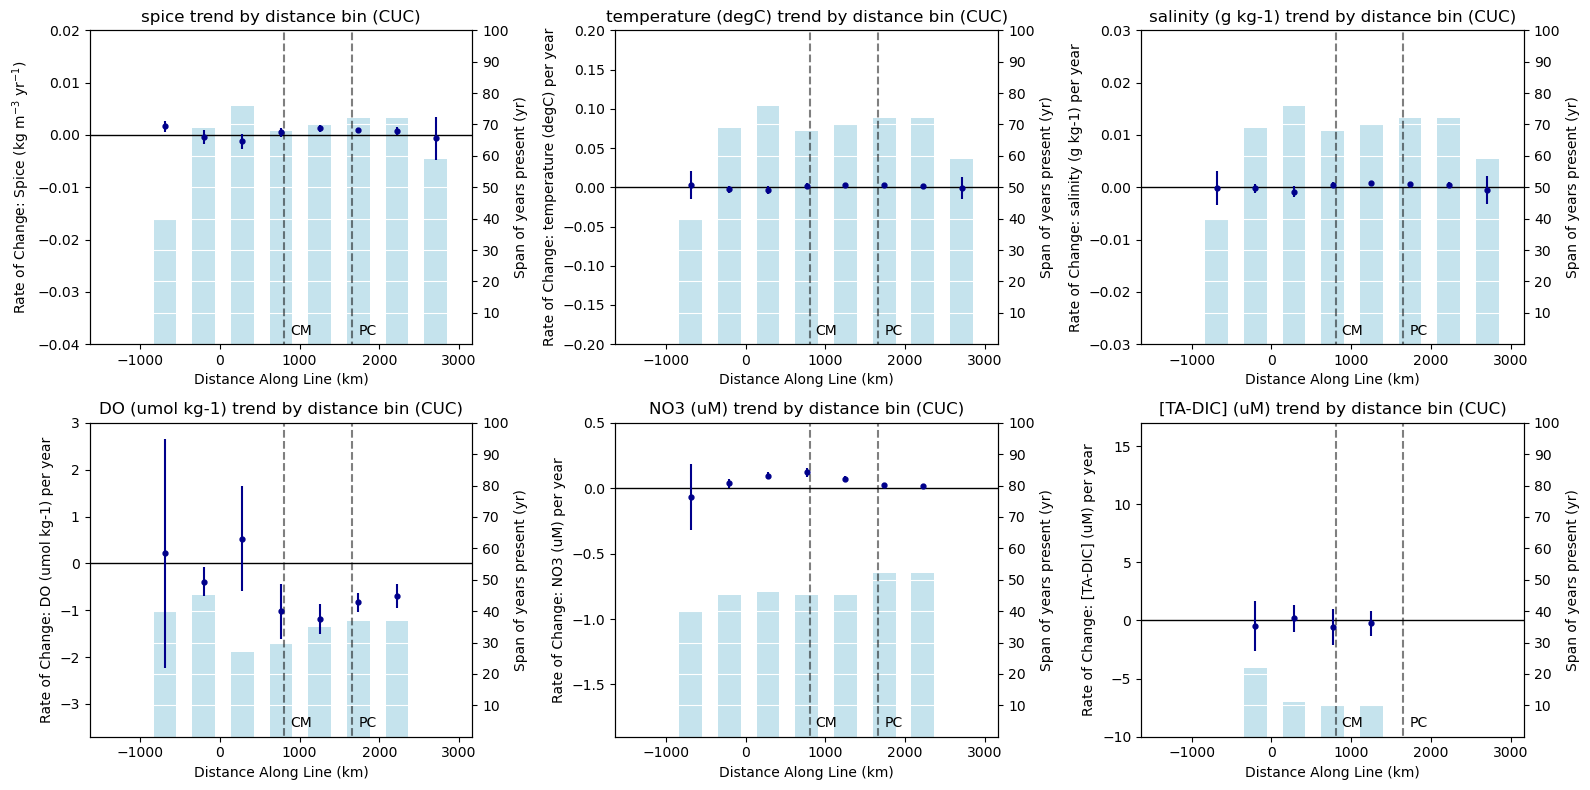

In [64]:
fig, ax = plt.subplots(2,3, figsize=(16, 8))
plot_ratediff_NS_CI('spice', 'CUC', (0,0))
plot_ratediff_NS_CI('temperature (degC)', 'CUC', (0,1))
plot_ratediff_NS_CI('salinity (g kg-1)', 'CUC', (0,2))
plot_ratediff_NS_CI('DO (umol kg-1)', 'CUC', (1,0))
plot_ratediff_NS_CI('NO3 (uM)', 'CUC', (1,1))
plot_ratediff_NS_CI('[TA-DIC] (uM)', 'CUC', (1,2))
plt.tight_layout()